# Motivation
<p>This analysis was inspired by the content in this youtube video by Veritasium: https://www.youtube.com/watch?v=3LopI4YeC4I&t</p>

<p>Starting at 3:36 in the video, Derek (guy in the awesome CGP Grey shirt) uses the NASA astronaut selection process as an example where 18300 applicants are competing for top 11 positions. He proposes a 95:5 ratio of skill score to luck score to obtain a total score of which only the top 11 would be successful. He concludes that the top 11 are very lucky, having an average luck score of 94.7% according to his simulation.</p>

<p>Intuitively, if the ratio of contribution to the final score was a 95:5 ratio, that should not change just because a higher consecutive subset was chosen in the distribution. To test this out, I decided to model his experiment using a normal distribution and an even distribution.</p>

<p>The conclusion is in the last cell of this notebeook for those not interested in the code that generated the simulation.</p>


# Imports and assumptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1729)
# There is a mean and std_dev tester below which I used to test these. 
# These values were chosen as they gave top 10 values that were close to the limits of 95 and 5 without exceeding them too often
mean_skill = 47.5
std_skill = 11
mean_luck = 2.5
std_luck=0.6

# Mean and Standard deviation testers

In [2]:
[sorted(np.random.normal(47.5,11,size=18300))[-1:] for i in range(5)]

[[87.4714925620294],
 [86.488989402102],
 [95.51662463230288],
 [91.1075930197654],
 [94.08599045003076]]

In [3]:
[sorted(np.random.normal(2.5,0.6,size=18300))[-1:] for i in range(5)]

[[4.892975021896092],
 [4.746956533254285],
 [4.750529517974606],
 [5.067885433027943],
 [4.8178616009937265]]

# Test Run

In [4]:
skill = np.random.normal(mean_skill,std_skill,size=18300)
luck = np.random.normal(mean_luck,std_luck,size=18300)

In [5]:
astro = pd.DataFrame({'skill':skill, 'luck':luck})
astro['total'] = astro.skill.values + astro.luck.values

In [6]:
astro.sort_values(by='total', inplace=True, ascending=False)
astro.head(11)

,skill,luck,total
9904,89.854107,2.130701,91.984808
1331,87.798236,2.545964,90.344200
9881,86.757163,2.096843,88.854006
1502,86.404505,2.441758,88.846263
6120,85.782278,2.209904,87.992182
8986,85.729862,2.170705,87.900566
6245,84.349227,2.858646,87.207872
2337,84.207718,2.581368,86.789086
12945,84.271392,2.133976,86.405368
14311,83.777828,2.452488,86.230316


In [7]:
astro.head(11)['skill'].mean(),astro.head(11)['luck'].mean()

(85.57771170500494, 2.4719143034660704)

# Normal distribution

In [8]:
def astro_selection_round_means_normal():
    skill = np.random.normal(mean_skill, std_skill,size=18300)
    luck = np.random.normal(mean_luck, std_luck,size=18300)
    candidates = pd.DataFrame({'skill':skill, 'luck':luck})
    candidates['total'] = candidates.skill.values + candidates.luck.values
    candidates.sort_values(by='total', inplace=True, ascending=False)
    return candidates.head(11)['skill'].mean(), candidates.head(11)['luck'].mean()

In [9]:
thousand_runs = [astro_selection_round_means_normal() for i in range(1000)]
# Little sanity check
thousand_runs[:5]

[(83.56785061727928, 2.5570712417767645),
 (86.23924060145566, 2.6360402240257894),
 (84.71025663692605, 2.4128048268390345),
 (85.75897723461198, 2.6034206708217464),
 (84.28867332739578, 3.1194240976503718)]

In [10]:
normal_run = np.array(thousand_runs).transpose()

Mean skill of top 11: 85.7887061870536
Standard deviations from mean: 3.4807914715503276


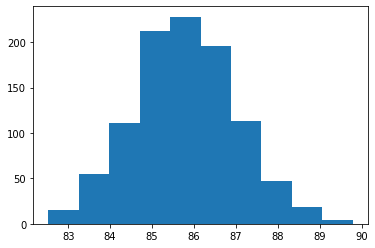

In [11]:
plt.hist(normal_run[0])
print(f"Mean skill of top 11: {normal_run[0].mean()}")
print(f"Standard deviations from mean: {(normal_run[0].mean() - mean_skill)/std_skill}")
plt.show()

Mean luck of top 11: 2.61137625303812
Standard deviations from mean luck: 0.18562708839686692


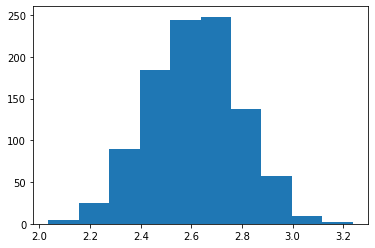

In [12]:
plt.hist(normal_run[1])
print(f"Mean luck of top 11: {normal_run[1].mean()}")
print(f"Standard deviations from mean luck: {(normal_run[1].mean() - mean_luck)/std_luck}")
plt.show()

# Even distribution

In [13]:
def astro_selection_round_mean_luck_even():
    skill = np.random.rand(18300)
    luck = np.random.rand(18300)
    candidates = pd.DataFrame({'skill':skill, 'luck':luck})
    candidates['total'] = candidates.skill.values*95 + candidates.luck.values*5
    candidates.sort_values(by='total', inplace=True, ascending=False)
    return candidates.head(11)['skill'].mean(), candidates.head(11)['luck'].mean()

In [14]:
thousand_runs = [astro_selection_round_mean_luck_even() for i in range(1000)]
# Little sanity check
thousand_runs[:5]

[(0.9972516699197507, 0.9234737586676457),
 (0.9970379678373696, 0.9327611709285262),
 (0.9971396382943074, 0.9638324361720081),
 (0.9976279009211866, 0.9598797144643172),
 (0.9970424821783507, 0.9364191353821223)]

In [15]:
even_run = np.array(thousand_runs).transpose()

0.9972828357466184


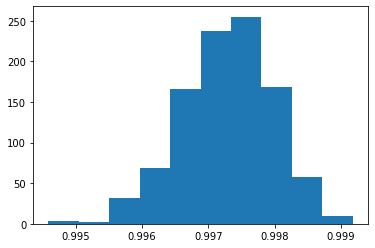

In [16]:
plt.hist(even_run[0])
print(even_run[0].mean())
plt.show()

0.9483866497988286


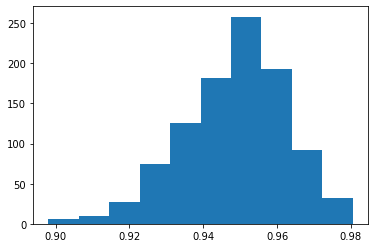

In [17]:
plt.hist(even_run[1])
print(even_run[1].mean())
plt.show()

# Conclusion

<p>It seems that Derek used an even distribution to get his 94.7% attribution of success to luck. However, an even distribution of luck and skill might not be a good model of the world.</p>
<p>When a normal distribution for luck and skill is used, the simulation shows that on average, the skill of the top 11 is 3.481 standard deviations from the mean and luck is only 0.186 standard deviations from the mean. This is closer to a 95:5 ratio of contribution.</p>
<p>3.481 / 0.186 = 18.715</p>
<p>95 / 5 = 19</p>